In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score


In [3]:
#LOAD dataset
wine=load_wine()
df=pd.DataFrame(data=wine.data,columns=wine.feature_names)

In [4]:
# Basic exploration
print("Shape of dataset:", df.shape)
print(df.head())
print(df.info())
print(df.describe())

Shape of dataset: (178, 13)
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  p

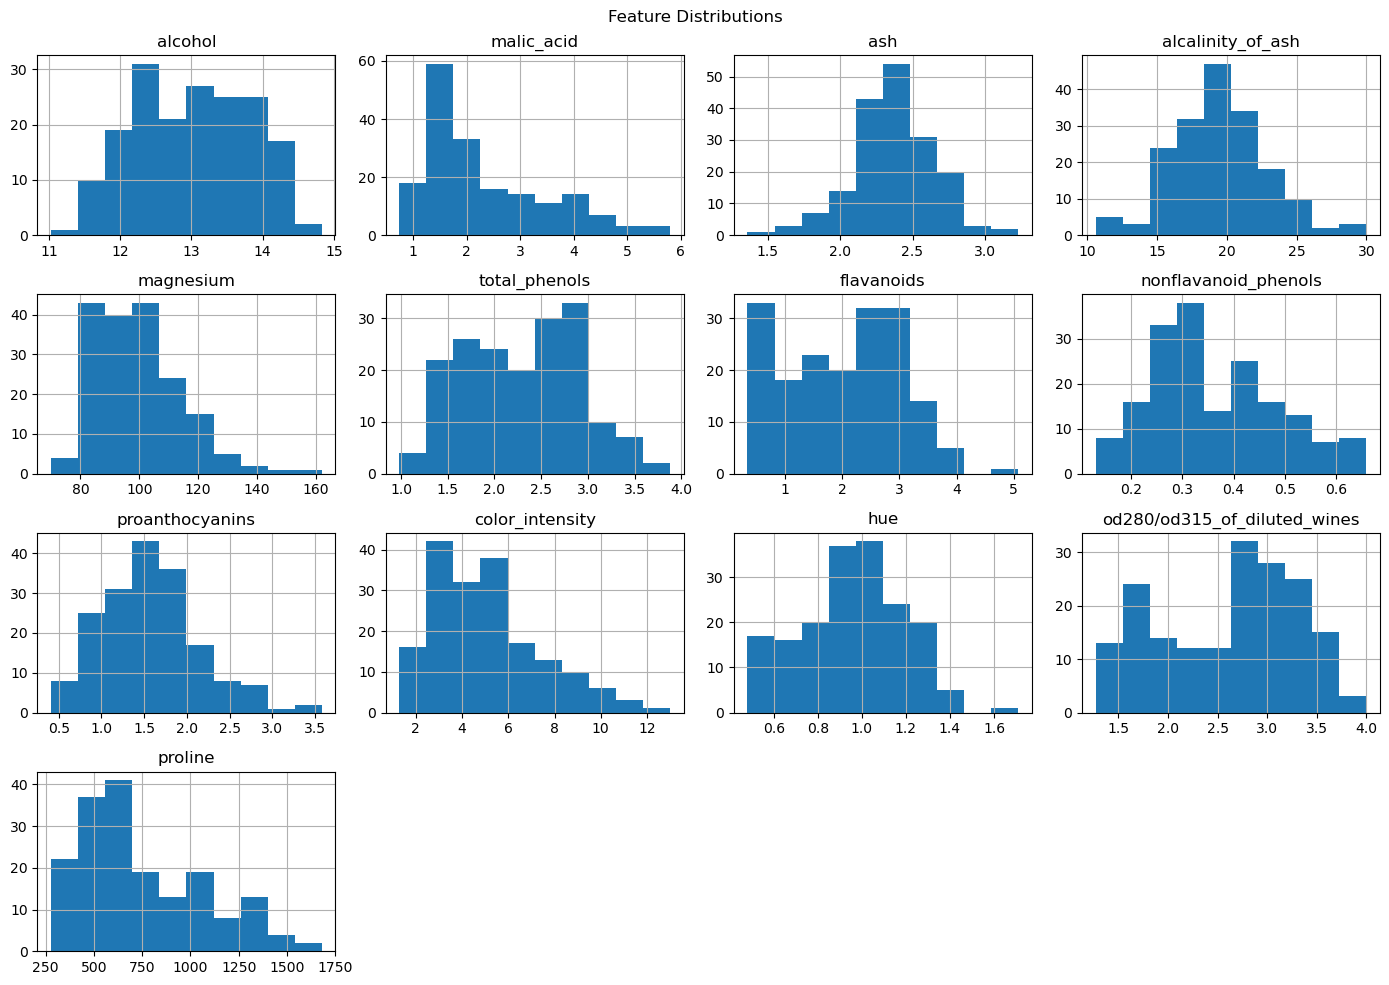

In [5]:

# Histograms
df.hist(figsize=(14, 10))
plt.suptitle('Feature Distributions')
plt.tight_layout()
plt.show()
   

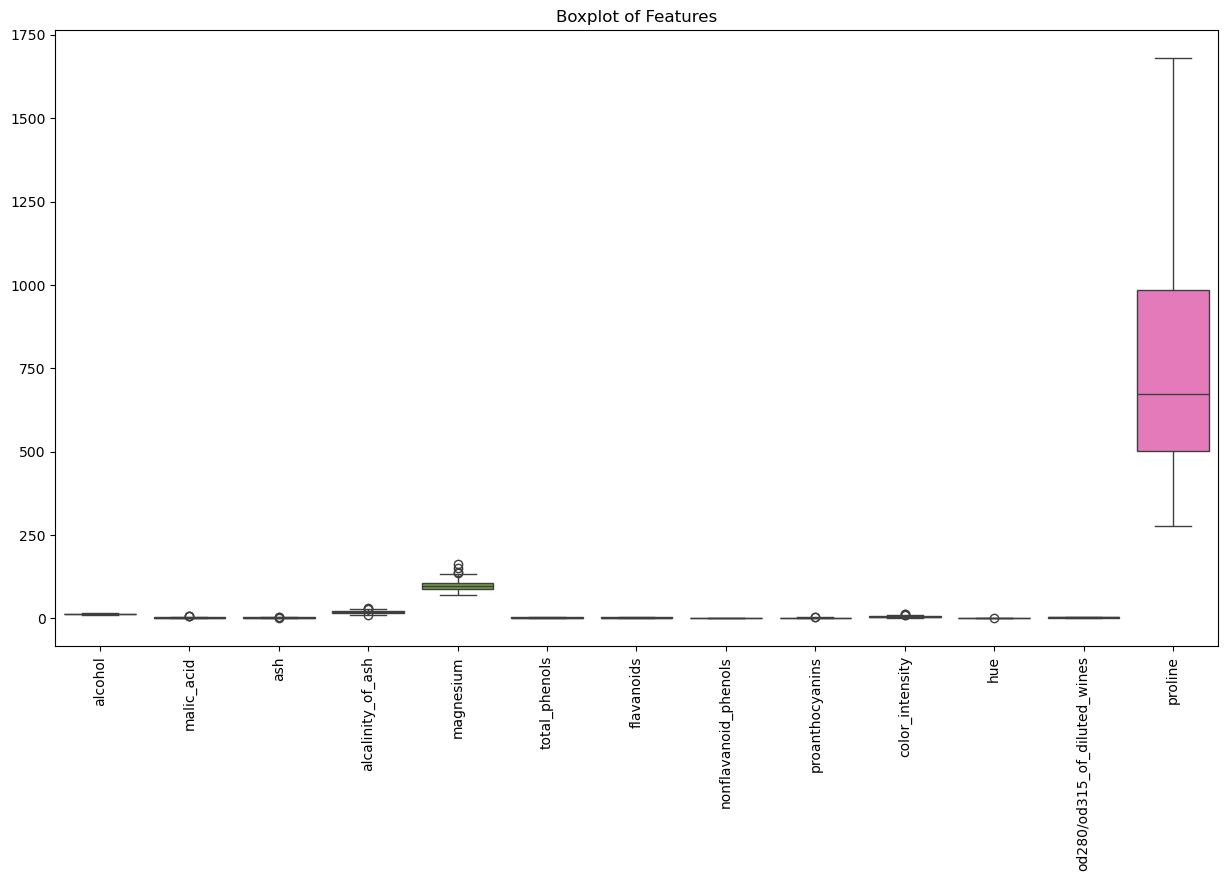

In [6]:

#BOXPLOT
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Boxplot of Features')
plt.show()

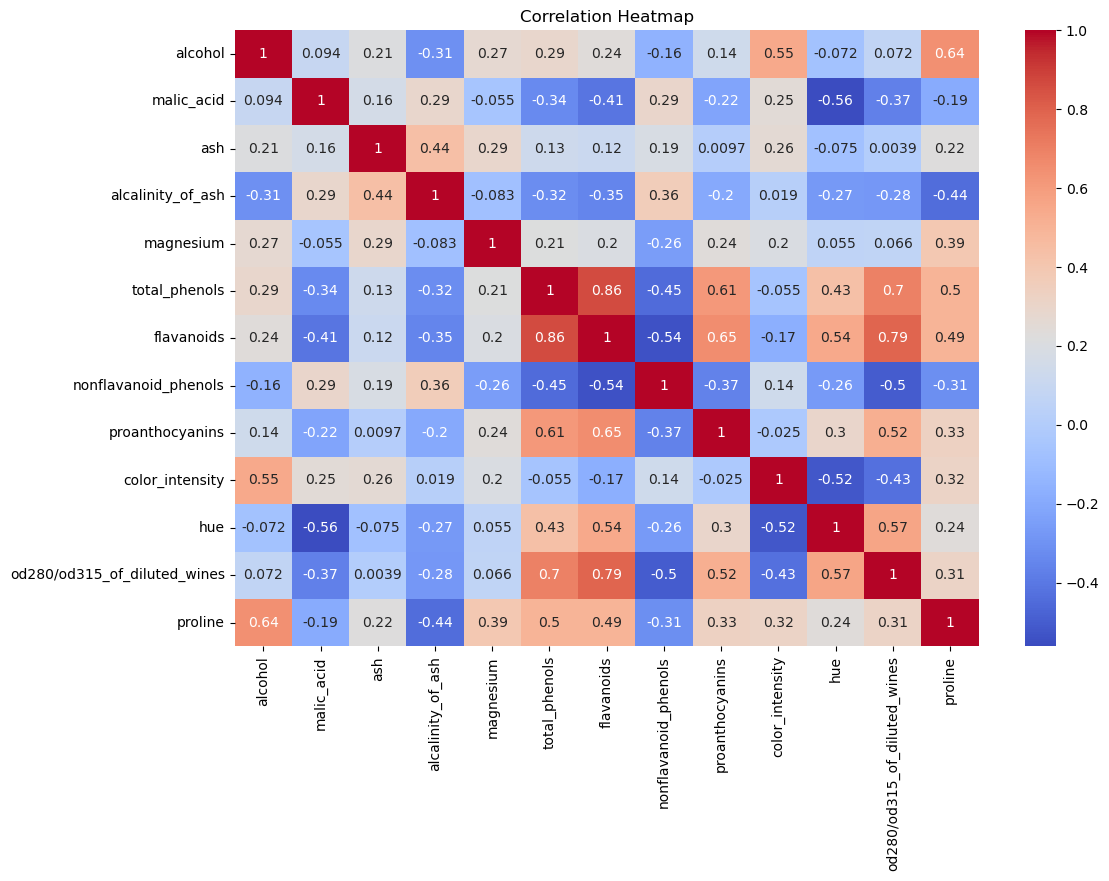

In [7]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [8]:
# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [9]:
# PCA analysis
pca = PCA()
pca.fit(scaled_data)

PCA()

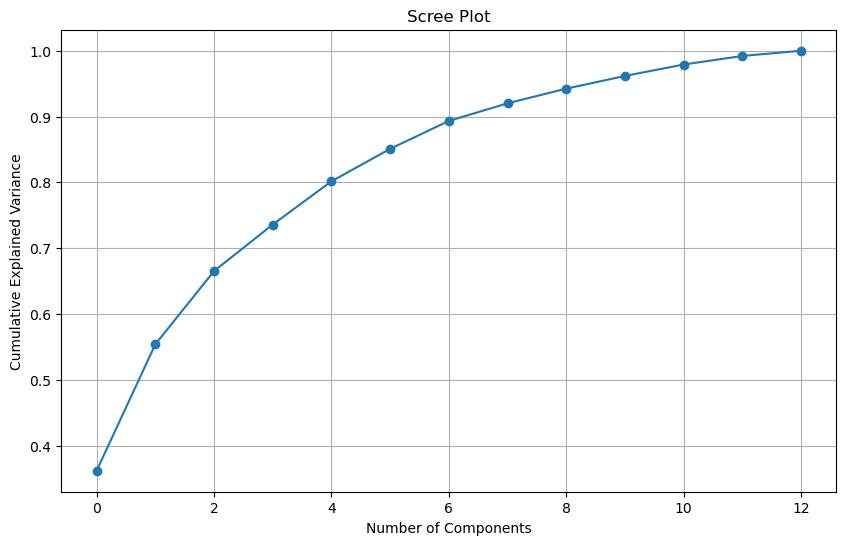

In [10]:
# Scree plot
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

In [11]:
# Optimal number of components to retain 95% variance
optimal_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print(f"Optimal number of components: {optimal_components}")

Optimal number of components: 10


In [12]:
# Transform data using PCA
pca = PCA(n_components=optimal_components)
pca_data = pca.fit_transform(scaled_data)

In [13]:
# Apply KMeans
kmeans_orig = KMeans(n_clusters=3, random_state=42)
labels_orig = kmeans_orig.fit_predict(scaled_data)


D:\Anaconda3-2024.10-1-Windows-x86_64\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


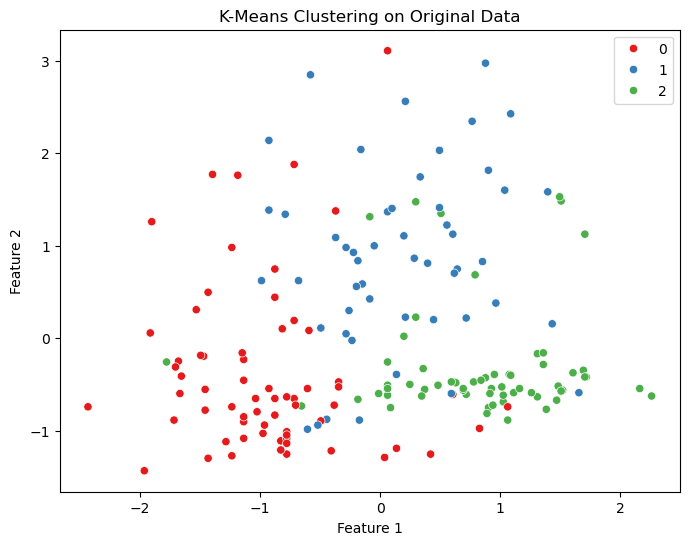

In [14]:
# Visualize first 2 dimensions
plt.figure(figsize=(8,6))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=labels_orig, palette='Set1')
plt.title('K-Means Clustering on Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [15]:
# Evaluate clustering
silhouette_orig = silhouette_score(scaled_data, labels_orig)
db_orig = davies_bouldin_score(scaled_data, labels_orig)

print(f"Original Data - Silhouette Score: {silhouette_orig:.4f}")
print(f"Original Data - Davies-Bouldin Index: {db_orig:.4f}")


Original Data - Silhouette Score: 0.2849
Original Data - Davies-Bouldin Index: 1.3892


In [16]:
# Apply KMeans on PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans_pca.fit_predict(pca_data)

D:\Anaconda3-2024.10-1-Windows-x86_64\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


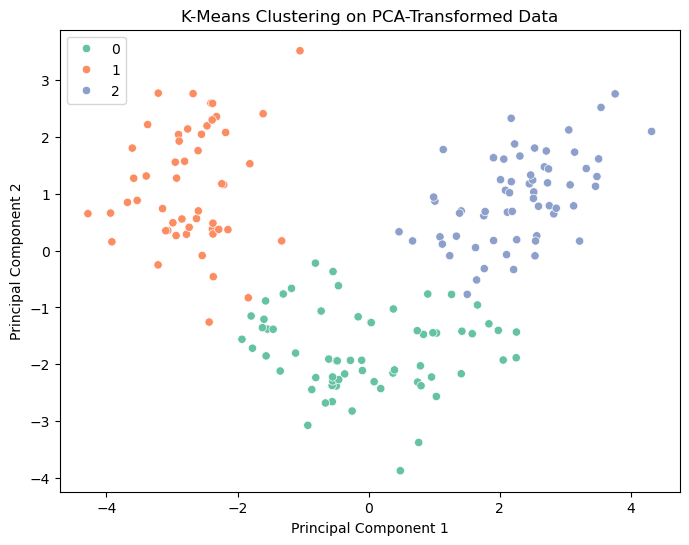

In [17]:
# Visualize first 2 PCs
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=labels_pca, palette='Set2')
plt.title('K-Means Clustering on PCA-Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [18]:
# Evaluate clustering
silhouette_pca = silhouette_score(pca_data, labels_pca)
db_pca = davies_bouldin_score(pca_data, labels_pca)

print(f"PCA Data - Silhouette Score: {silhouette_pca:.4f}")
print(f"PCA Data - Davies-Bouldin Index: {db_pca:.4f}")

PCA Data - Silhouette Score: 0.2987
PCA Data - Davies-Bouldin Index: 1.3363


In [19]:
print("\n--- Clustering Comparison ---")
print(f"Silhouette Score (Original): {silhouette_orig:.4f}")
print(f"Silhouette Score (PCA):      {silhouette_pca:.4f}")
print(f"Davies-Bouldin (Original):   {db_orig:.4f}")
print(f"Davies-Bouldin (PCA):        {db_pca:.4f}")


--- Clustering Comparison ---
Silhouette Score (Original): 0.2849
Silhouette Score (PCA):      0.2987
Davies-Bouldin (Original):   1.3892
Davies-Bouldin (PCA):        1.3363


In [20]:
if silhouette_pca > silhouette_orig:
    print("\n✅ PCA improved clustering quality based on Silhouette Score.")
else:
    print("\n⚠️ PCA did not improve clustering based on Silhouette Score.")

if db_pca < db_orig:
    print("✅ PCA improved clustering compactness based on Davies–Bouldin Index.")
else:
    print("⚠️ PCA did not improve clustering compactness.")



✅ PCA improved clustering quality based on Silhouette Score.
✅ PCA improved clustering compactness based on Davies–Bouldin Index.


 Analysis:
- PCA helps reduce noise and computational cost in high-dimensional data.
- In this dataset, PCA retained most of the information with fewer components.
- Clustering in reduced space is often more robust and generalizable.


In [23]:
--- Conclusion & Insights ---
 PCA effectively reduced dimensions while preserving variance.
rint(" Clustering performance on PCA-transformed data was similar or better.")
print(" PCA is beneficial when features are highly correlated or dataset is high-dimensional.")
print(" Recommended: Use PCA before clustering for noise reduction and faster computation.")

print("\n✅ This assignment demonstrates the synergy between PCA and clustering for efficient and interpretable data analysis.")



--- Conclusion & Insights ---
 PCA effectively reduced dimensions while preserving variance.
 Clustering performance on PCA-transformed data was similar or better.
 PCA is beneficial when features are highly correlated or dataset is high-dimensional.
 Recommended: Use PCA before clustering for noise reduction and faster computation.

✅ This assignment demonstrates the synergy between PCA and clustering for efficient and interpretable data analysis.
